67 67 67 67
counter: 67
length: 67
percentage: 100.0
class: 0
67 67 67 67
counter: 67
length: 67
percentage: 100.0
class: 0
73 73 73 73
counter: 70
length: 73
percentage: 95.8904109589041
class: 3


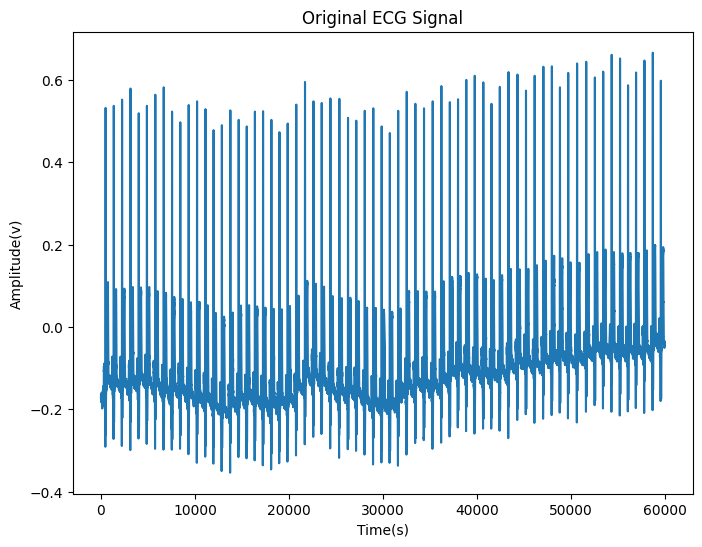

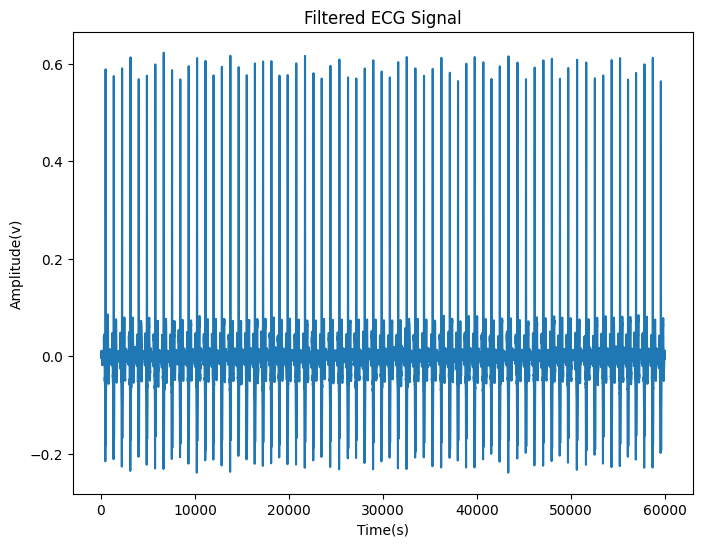

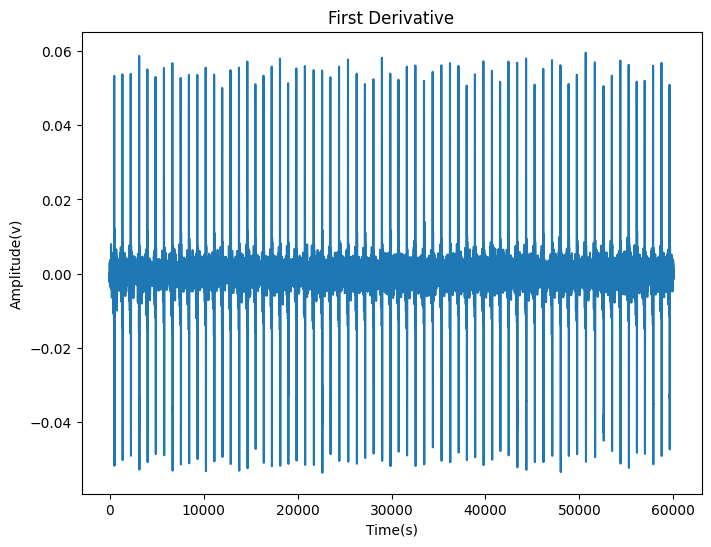

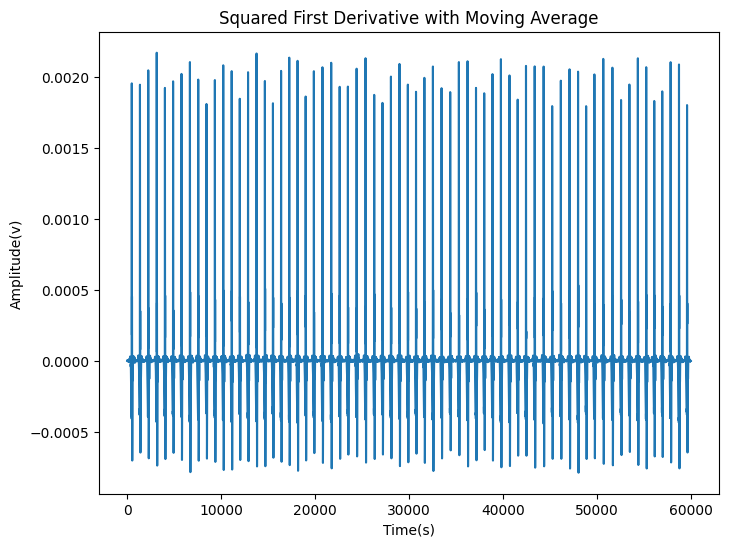

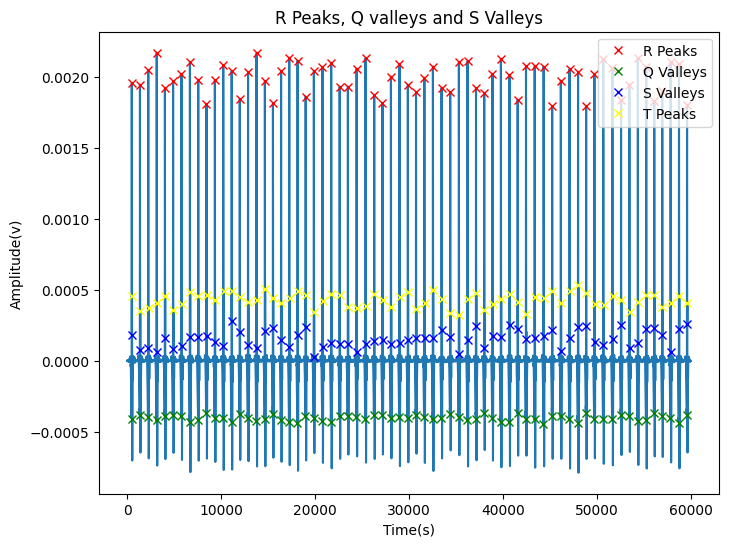

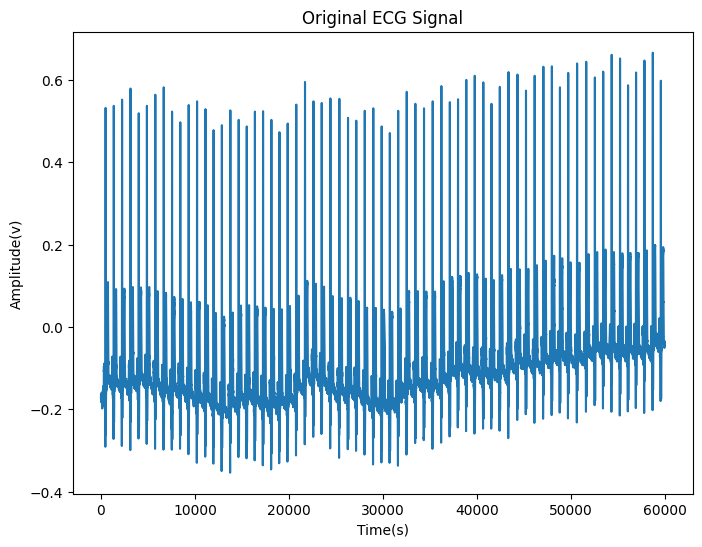

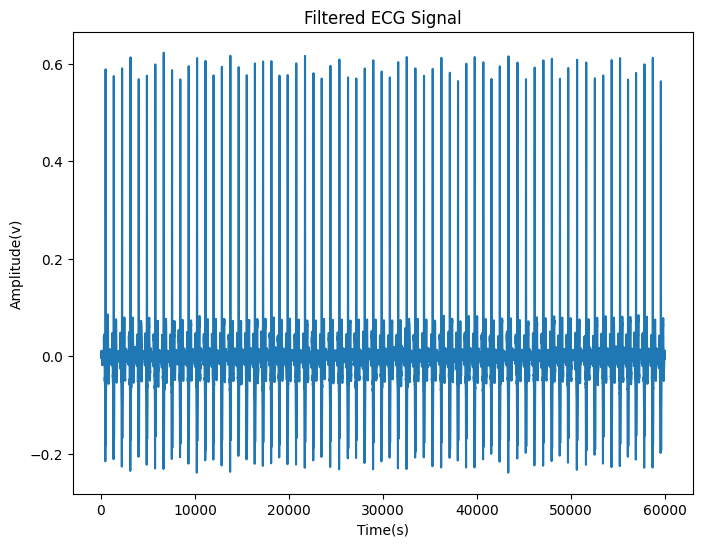

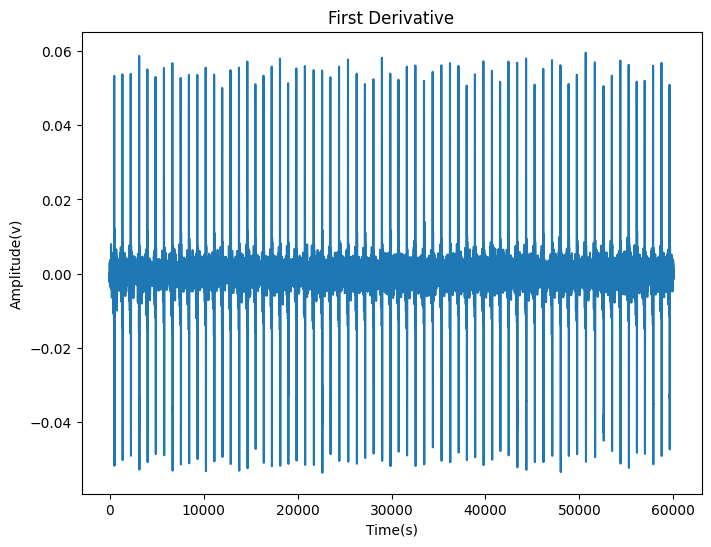

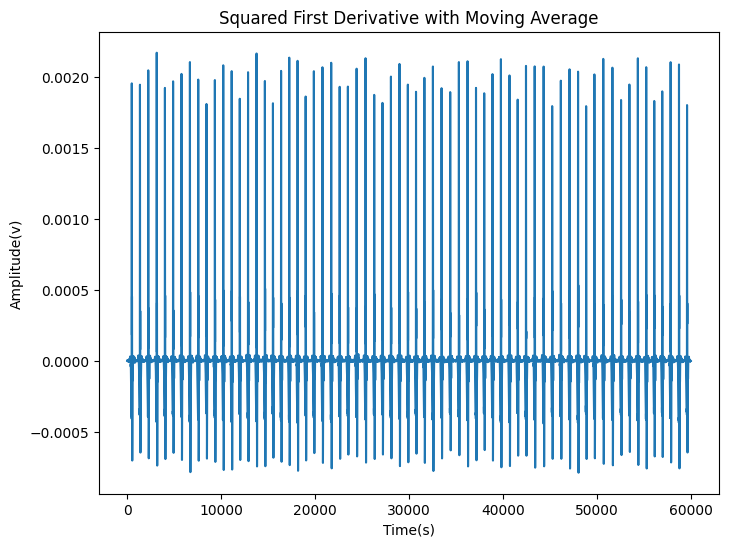

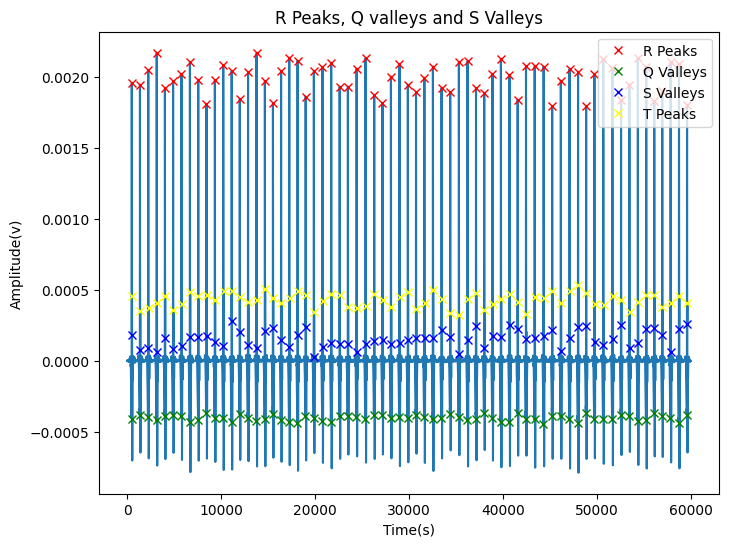

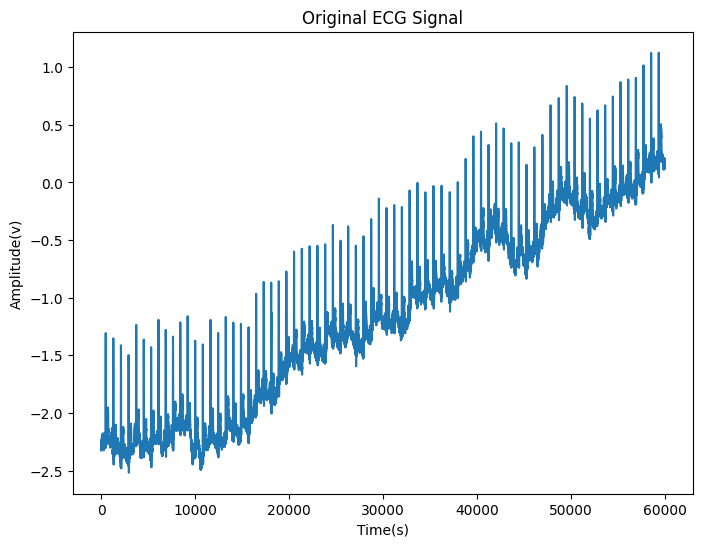

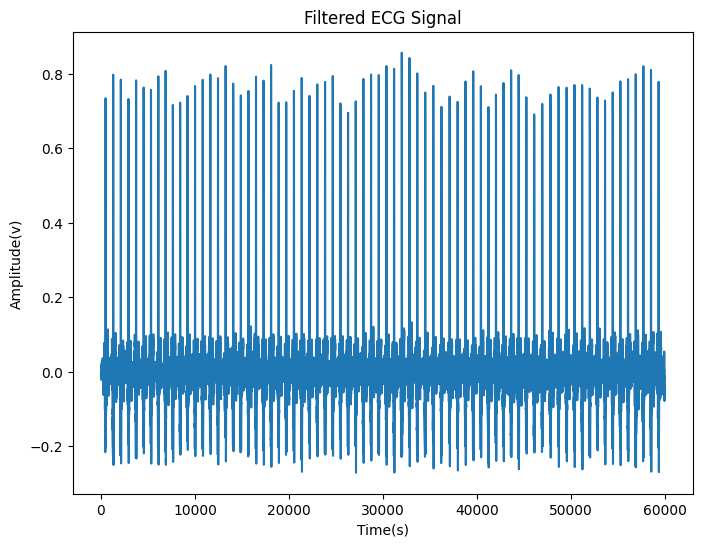

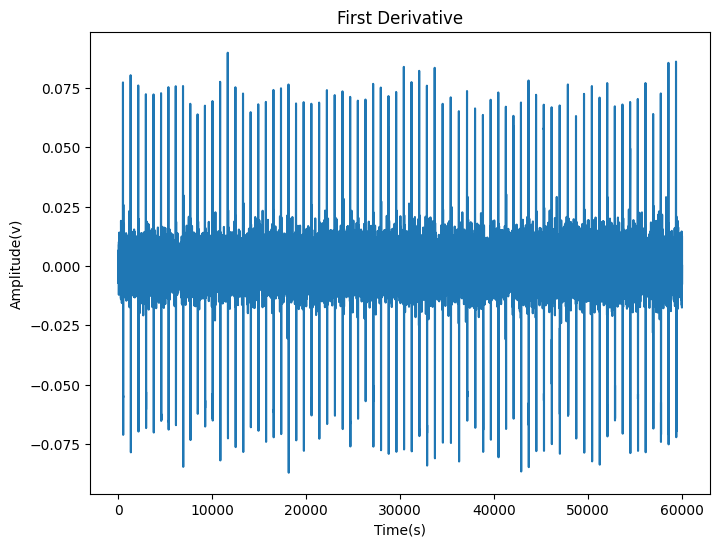

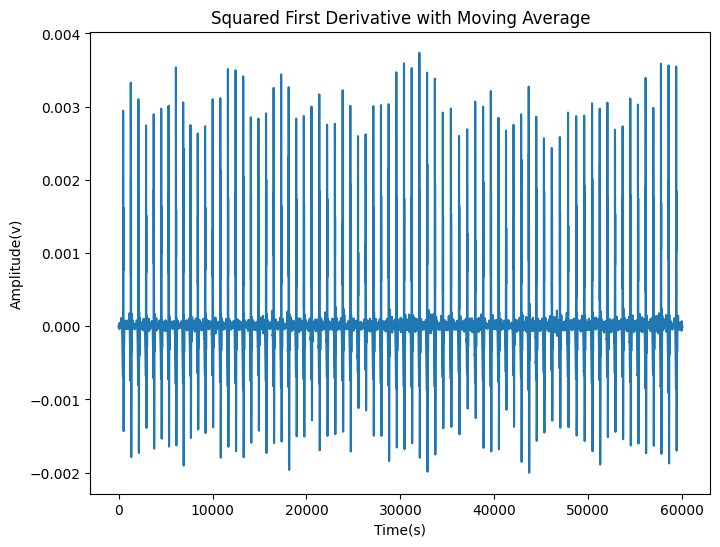

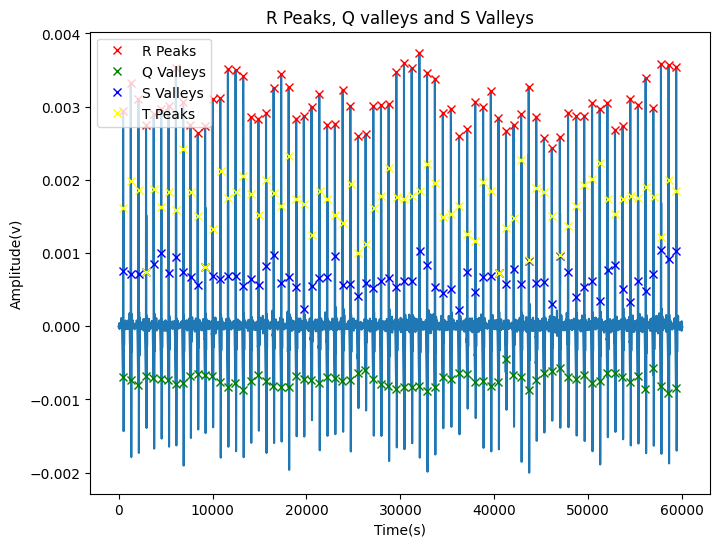

In [1]:
import numpy as np
import tkinter as tk
from main import process_ecg_file
from tkinter import filedialog
import pickle
from collections import Counter
from PIL import ImageTk, Image
import threading

file_path = None
custom_font = ("Times new roman", 15, "bold")

class Person:
    def __init__(self, name, id, age):
        self.name = name
        self.id = id
        self.age = age


def browse():
    global file_path
    file_path = filedialog.askopenfilename(filetypes=[("CSV Files", "*.csv")])

    label.config(text="File was Selected Successfully")


def authenticate():


    name_entry.delete(0, tk.END)
    id_entry.delete(0, tk.END)
    age_entry.delete(0, tk.END)

    global file_path
    R, S, Q, T = process_ecg_file(file_path)

    # print(Q)
    # print(R)
    # print(S)
    # print(T)

    X = np.array([R, S, Q, T]).T

    # print(X)

    with open('Gradient Boosting.pkl', 'rb') as file:
        model = pickle.load(file)

    predictions = model.predict(X)

    # Count occurrences of each element
    counts = Counter(predictions)

    # Find the most common element and its count
    mcn, count = counts.most_common(1)[0]

    per = (count/len(predictions))*100

    print("counter:", count)
    print("length:", len(predictions))
    print("percentage:", per)
    print("class:", mcn)
    # print(predictions)

    youssef = Person("Youssef Fathy", 20191700779, 22)
    yassa = Person("Yassa Kamille", 20201700986, 22)
    kerlos1 = Person("Kirolos Waheed", 20201700616 , 22)
    kerlos2 = Person("Kirolos Helal", 20191700461, 23)

    if count >= len(predictions) * (9.6/10):
        label.pack()
        if mcn == 0:
            name_entry.insert(tk.END, youssef.name)
            id_entry.insert(tk.END, youssef.id)
            age_entry.insert(tk.END, youssef.age)
            label.config(text="User is identified")
        elif mcn == 1:
            name_entry.insert(tk.END, yassa.name)
            id_entry.insert(tk.END, yassa.id)

            age_entry.insert(tk.END, yassa.age)
            label.config(text="User is identified")
        elif mcn == 2:
            name_entry.insert(tk.END, kerlos1.name)
            id_entry.insert(tk.END, kerlos1.id)
            age_entry.insert(tk.END, kerlos1.age)
            label.config(text="User is identified")
        else:
            name_entry.insert(tk.END, kerlos2.name)
            id_entry.insert(tk.END, kerlos2.id)
            age_entry.insert(tk.END, kerlos2.age)
            label.config(text="User is identified")
    else:
        label.config(text="User is not identified")


# Create the main window
root = tk.Tk()
root.title("ECG")

gif_frames = []
delay = 0

def get_gif_ready():
    global delay
    gif_file = Image.open("R.gif")
    frame_numbers = gif_file.n_frames
    for e in range(frame_numbers):
        gif_file.seek(e)
        gif_frames.append(gif_file.copy())

    delay = gif_file.info['duration']
    play()

count = -1

def play():
    global count, current
    if count >= len(gif_frames) - 1:
        count = 0  # Reset to the first frame instead of -1
    else:
        count += 1
    current = ImageTk.PhotoImage(gif_frames[count])
    bg_label.config(image=current)
    root.after(delay, play)

threading.Thread(target=get_gif_ready).start()

bg_label = tk.Label(root)
bg_label.place(x=0, y=50, relwidth=1, relheight=1)

fg_image = Image.open("icon.png")
fg_image = fg_image.resize((600, 120), Image.ADAPTIVE)  # Resize image to desired size

# Convert the foreground image to a Tkinter PhotoImage
fg_photo = ImageTk.PhotoImage(fg_image)

# Create a Label widget to display the foreground image
fg_label = tk.Label(root, image=fg_photo)
fg_label.pack(pady=1) # Place the foreground image at desired coordinates

label1 = tk.Label(root, text="Name", font=((custom_font)))
label1.place(x=80, y=240)

name_entry = tk.Entry(root)
name_entry.place(x=160, y=240)

label2 = tk.Label(root, text="ID", font=(custom_font))
label2.place(x=80, y=320)

id_entry = tk.Entry(root)
id_entry.place(x=160, y=320)

label3 = tk.Label(root, text="Age", font=(custom_font))
label3.place(x=80, y=400)

age_entry = tk.Entry(root)
age_entry.place(x=160, y=400)

# Create a button
button = tk.Button(root, text="Browse", command=browse,  font=(custom_font))
button.place(x=400, y=270)

# Create a button
button = tk.Button(root, text="Authenticate", command=authenticate,  font=(custom_font))
button.place(x=378, y=370)


root.geometry("600x500")
# Create a label to print a word
label = tk.Label(root, text="", font=(custom_font, 12))
label.pack(pady=30)

# Run the main event loop
root.mainloop()


In [ ]:
|